# Sports Marketing Contest

In [246]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
# import linear regression classifier
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.spatial import distance
from scipy.cluster import hierarchy

# needed for LDA algorithm for missing values
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier

#t-testing
from scipy import stats

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

## Description of Data

#### X Variables  Description
##### FAKEID
the ticket buyer's unique ID number
##### YXdefect 	"X" indicates the year
Y3defect=1 for year 2 ticket holders that did not renew for year 3
Y3defect=0 for year 2 ticket holders that did renew for year 3
Y2defect=1 for year 1 ticket holders that did not renew for year 2
Y2defect=0 for year 1 ticket holders that did renew for year 2             
##### YXGZ	     "X" indicates the year, "Z" indicates the game
e.g. Y2G4=1 for the tickets being used for game 4 in year 2
e.g. Y2G4=0 for the tickets not being used for game 4 in year 2            
##### YXprice: "X" indicates the year
the price paid per ticket in the indicated year             
##### YEARS
the number of years as a season ticket holder
##### BACKER	     
1=member of the team's "backer" club
0=not a member of the team's "backer" club             
##### AGE
age of the ticket buyer (blank=unknown)
##### INCOME
income category of the ticket buyer (0=low, 6=high)
##### CHILD	     
1=at least one child age 0-18 in household 
(blank indicates none or unknown) 
(Deleted due to 8634 Null values)
##### GNDR	     
1=male, 
0=female, blank=unknown
##### OWNHOME	     
1=owns home
0=does not own home, blank=unknown
#### Purchased appended data
##### SPORT
1=subscribes to a sports magazine
0=does not subscribe to a sports magazine, blank = unknown
##### COMP	     
(Deleted Due to 8207 null values)
1=owns a PC (blank indicates does not own a PC or unknown)
#### Appended census data at zip code level
##### PCTMARR
percentage of married heads of household
##### HOMEVAL
average value of homes in 1000s of dollars
             
### Road Map: 
1. Clean Dataset (fill nan values for calibration set)
2. Data Visualization (Visualize the data to better understand how x's relate to y
3. Exploratory Data Analysis (Test my assumptions further explore the x's)
4. Begin the classification using the models Knn, Logistic Regression, Random Forest
5. Choose the most accurate classification
6. Predict scores for y value and test it against the data already in calibration
7. Move on to validation table set and clean the data
8. Once data is cleaned use the best model to predict the y value for Y3
9. Fill out the submission form

# Part 1 Calibration

## Import Calibration Dataset

In [247]:
#calibration dataset after clearing out NaN and keeping a blank so null values can be counted for
calibration=pd.read_csv("datasets/calibration/Calibration.csv")
calibration.head(25)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77.0,0.0,NaN,0.0,NaN,0.0,NaN,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67.0,1.0,1.0,1.0,NaN,NaN,NaN,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,NaN,1.0,1.0,0.0,NaN,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54.0,3.0,NaN,0.0,NaN,NaN,NaN,51,90


In [248]:
#data types & missing values
calibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [249]:
# null values per column
calibration.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

# Data Cleansing

#### Cleaning columns GNDR, INCOME, OWNHOME, SPORT with mean

In [250]:
calibration['GNDR'].median()

0.0

In [391]:
calibration = calibration.fillna({'GNDR': 0.0})

In [252]:
calibration['INCOME'].median()

3.0

In [390]:
calibration = calibration.fillna({'INCOME': 3.0})

In [254]:
calibration['OWNHOME'].median()

1.0

In [388]:
calibration = calibration.fillna({'OWNHOME': 1.0})

In [256]:
calibration['SPORT'].median()

0.0

In [389]:
calibration = calibration.fillna({'SPORT': 0.0})

#### Drop Columns CHILD and COMP due to too many null

In [258]:
calibration = calibration.drop(['CHILD','COMP'], axis=1)
calibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,0.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,3.0,0.0,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,0.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,0.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,0.0,65,194


In [259]:
calibration.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME         0
GNDR           0
OWNHOME        0
SPORT          0
PCTMARR        0
HOMEVAL        0
dtype: int64

# Data Visualization

#### Understanding the Data for DF Calibration

In [377]:
calibration=pd.read_csv("datasets/calibration/calibrationfinal.csv")
calibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,63,3,0,0,0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,0,65,194


In [378]:
calibration.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
SPORT       0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [379]:
calibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 17 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null int64
INCOME      9216 non-null int64
GNDR        9216 non-null int64
OWNHOME     9216 non-null int64
SPORT       9216 non-null int64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: int64(16), object(1)
memory usage: 1.2+ MB


#### Charts and Pivot Tables

In [380]:
# pivot count of defect among different incomes
calibration.groupby(['INCOME', 'Y2defect']).size().sort_values(ascending=False)

INCOME  Y2defect
3       1           1631
        0           1546
4       0            790
        1            767
1       0            661
        1            626
2       0            445
0       0            441
        1            434
2       1            408
5       0            383
        1            380
6       1            362
        0            342
dtype: int64

In [381]:
# pivot count defect among sex
calibration.groupby(['GNDR', 'Y2defect']).size()

GNDR  Y2defect
0     0           2675
      1           2642
1     0           1933
      1           1966
dtype: int64

In [384]:
# for those who did and didn't defect, who went to the 5th game
calibration.groupby(['Y1G5','Y1G4','Y1G3','Y1G2','Y1G1','Y2defect']).size().sort_values(ascending=False).head()

Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y2defect
0     1     1     0     0     1           748
      0     1     0     0     1           740
                              0           480
      1     0     0     0     1           382
            1     0     0     0           379
dtype: int64

In [386]:
# count for top ages between those who did and didn't default
calibration.groupby(['Y2defect', 'AGE']).size().sort_values(ascending=False).head()

Y2defect  AGE
1         63     299
0         63     259
1         61     193
0         65     174
          61     172
dtype: int64

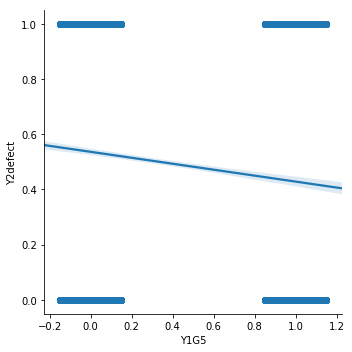

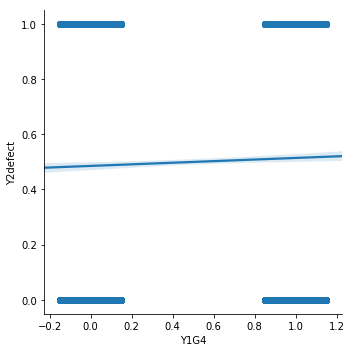

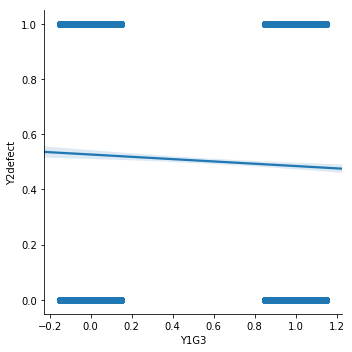

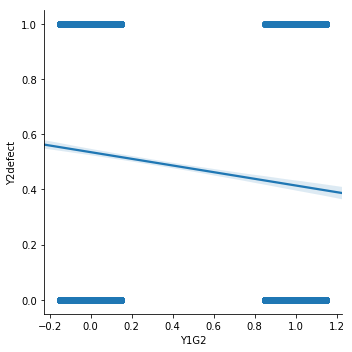

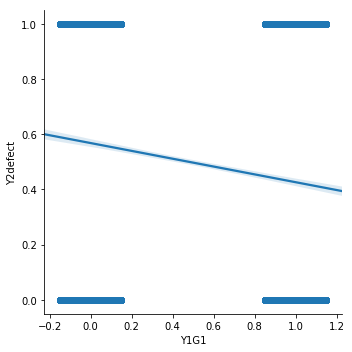

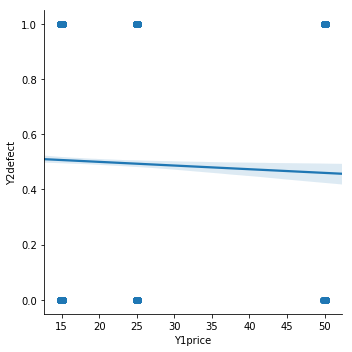

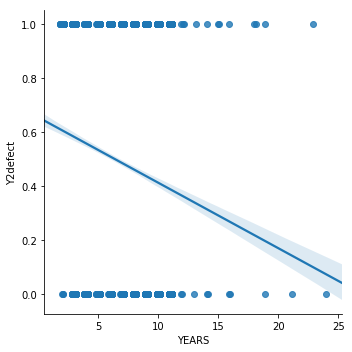

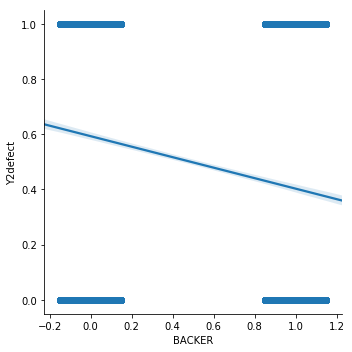

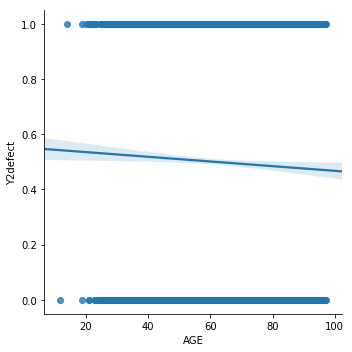

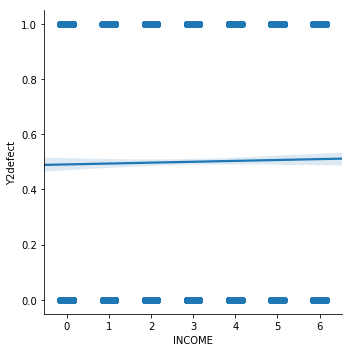

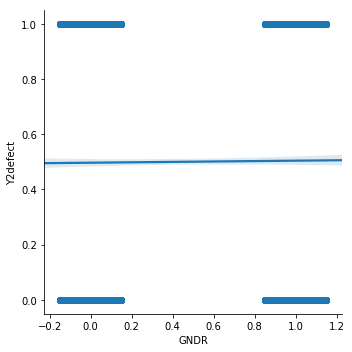

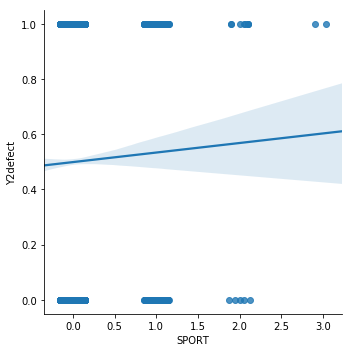

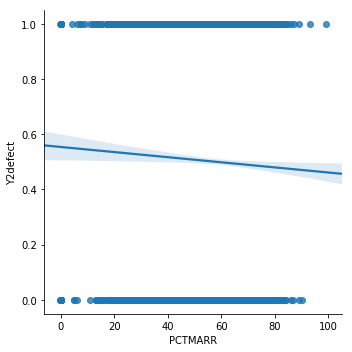

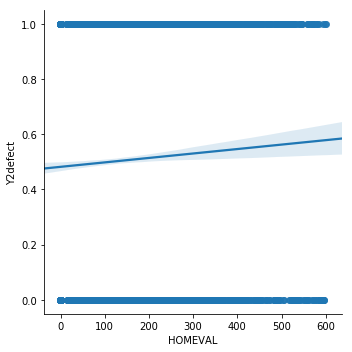

In [387]:
#linear regression between x values and Y2defect
sns.lmplot("Y1G5", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("Y1G4", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("Y1G3", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("Y1G2", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("Y1G1", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("Y1price", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("YEARS", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("BACKER", "Y2defect",calibration, x_jitter=.15)
sns.lmplot("AGE", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("INCOME", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("GNDR", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("SPORT", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("PCTMARR", "Y2defect", calibration, x_jitter=.15)
sns.lmplot("HOMEVAL", "Y2defect", calibration, x_jitter=.15)

## Exploratory Data Analysis

#### Correlation & Heatmap for DF Calibration

In [393]:
calibration.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.025080,0.010530,0.007248,-0.018063,0.011944,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.029739,-0.000865,-0.005599,0.021317,0.005457,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.066358,0.006825,0.002400,0.043924,0.017533,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.026548,0.020746,0.000198,-0.029841,-0.002252,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.103004,-0.013631,-0.009714,-0.002148,0.003123,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.088947,-0.028290,-0.025717,-0.002415,0.004151,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.029440,0.071470,0.042429,-0.018103,0.010261,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.300827,-0.089712,-0.020403,-0.003753,-0.022063,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.193569,-0.084987,-0.029201,-0.008838,-0.020048,0.032558,-0.064727
AGE,-0.025080,0.029739,-0.066358,-0.026548,0.103004,0.088947,-0.029440,0.300827,0.193569,1.000000,-0.223558,0.013121,-0.059573,-0.020592,-0.058278,-0.014875


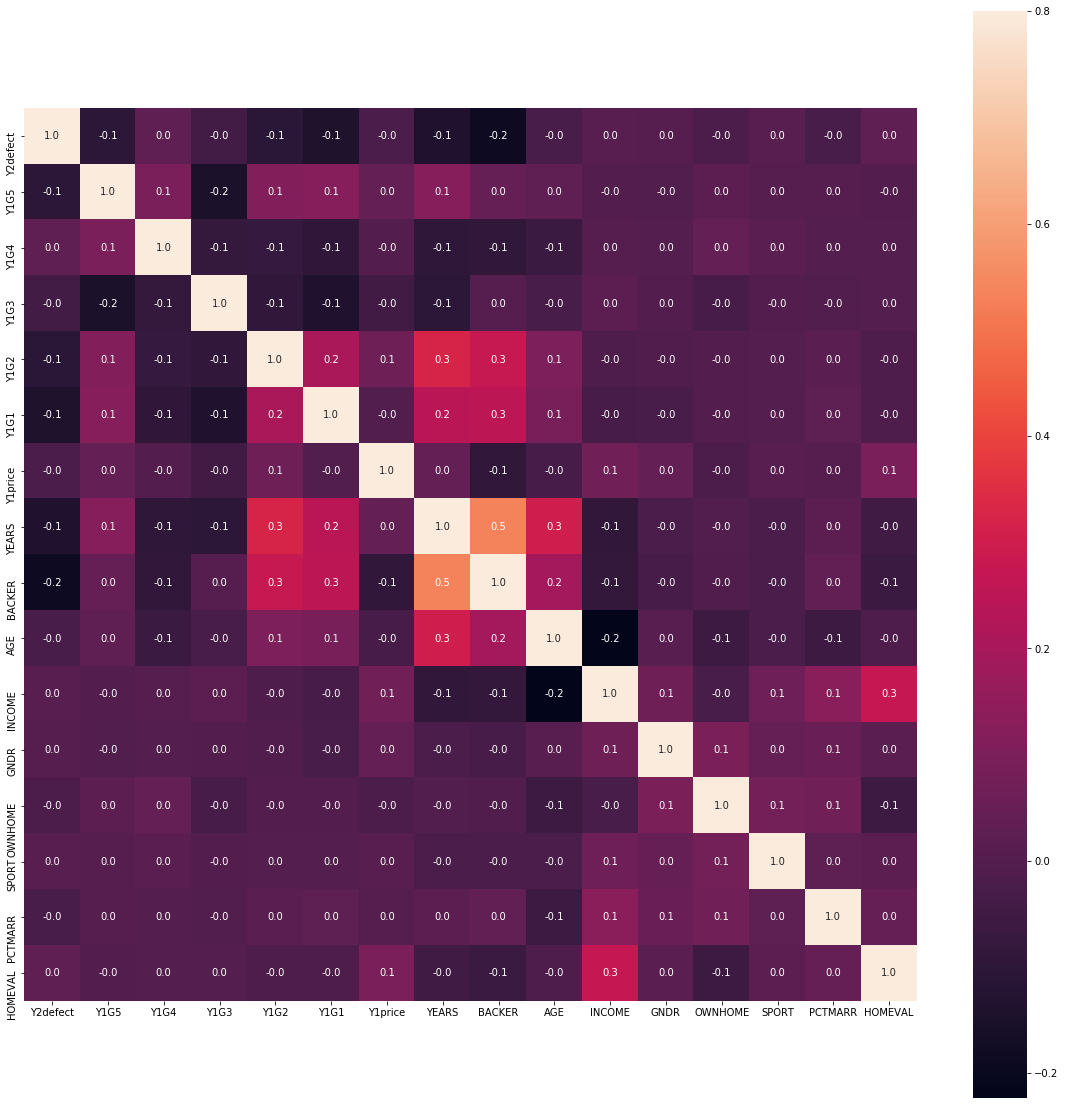

In [394]:
plt.figure(figsize=(20,20))
sns.heatmap(calibration.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

Backer is the most negatively correlated to Y2defect nothing else is significant

#### Variance and Box Plots for DF Calibration

In [395]:
calibration.var()

Y2defect       0.250027
Y1G5           0.223463
Y1G4           0.249916
Y1G3           0.231333
Y1G2           0.206393
Y1G1           0.249637
Y1price       77.795709
YEARS          8.259459
BACKER         0.249916
AGE          218.576583
INCOME         2.684895
GNDR           0.244108
OWNHOME        0.171830
SPORT          0.029798
PCTMARR      166.466060
HOMEVAL     8517.854476
dtype: float64

In [396]:
calibration.std(0)

Y2defect     0.500027
Y1G5         0.472718
Y1G4         0.499916
Y1G3         0.480971
Y1G2         0.454305
Y1G1         0.499637
Y1price      8.820188
YEARS        2.873927
BACKER       0.499916
AGE         14.784336
INCOME       1.638565
GNDR         0.494073
OWNHOME      0.414524
SPORT        0.172622
PCTMARR     12.902173
HOMEVAL     92.292223
dtype: float64

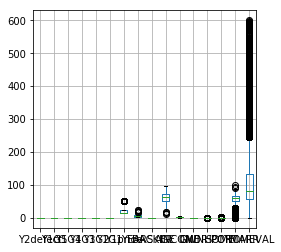

In [399]:
calibration.boxplot(figsize=(4, 4))

# Classification Models to Predict Defect in Calibration

#### KNN for DF Calibration

In [98]:
# declare variables for Knn Analysis
y = calibration['Y2defect']
X = calibration.drop(['Y2defect','FAKEID'], axis=1)

In [370]:
# develop a new knn model with k = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [371]:
# Here I evaluate the model, but don't validate it yet
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.519349005425
[[746 617]
 [712 690]]
             precision    recall  f1-score   support

          0       0.51      0.55      0.53      1363
          1       0.53      0.49      0.51      1402

avg / total       0.52      0.52      0.52      2765

0.51973807463


#### Logistic Regression for DF Logiccalibration

In [411]:
#create new dataframe so the columns can be minipulated
logiccalibration=pd.DataFrame(calibration)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,63,3,0,0,0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,0,65,194


In [403]:
#Create dummy variables for all columns necessary
job_dummies = pd.get_dummies(logiccalibration['Y1G5'], prefix='Y1G5')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,Y1G5_0,Y1G5_1
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,0,77,203,1,0
1,298S54OK,1,0,0,1,0,1,15,3,1,63,3,0,0,0,53,68,1,0
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,0,50,38,0,1
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,0,60,68,0,1
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,0,65,194,1,0


In [404]:
job_dummies = pd.get_dummies(logiccalibration['Y1G4'], prefix='Y1G4')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,Y1G5_0,Y1G5_1,Y1G4_0,Y1G4_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,4,0,1,0,77,203,1,0,1,0
1,298S54OK,1,0,0,1,0,1,15,3,1,...,3,0,0,0,53,68,1,0,1,0
2,268D25AO,1,1,0,0,0,1,15,11,1,...,2,0,1,0,50,38,0,1,1,0
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,4,1,1,0,60,68,0,1,1,0
4,420R23VB,0,0,0,1,0,0,15,5,0,...,4,1,1,0,65,194,1,0,1,0


In [126]:
job_dummies = pd.get_dummies(logiccalibration['Y1G3'], prefix='Y1G3')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,OWNHOME,SPORT,PCTMARR,HOMEVAL,Y1G5_0,Y1G5_1,Y1G4_0,Y1G4_1,Y1G3_0,Y1G3_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,1,0,77,203,1,0,1,0,0,1
1,298S54OK,1,0,0,1,0,1,15,3,1,...,0,0,53,68,1,0,1,0,0,1
2,268D25AO,1,1,0,0,0,1,15,11,1,...,1,0,50,38,0,1,1,0,1,0
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,1,0,60,68,0,1,1,0,0,1
4,420R23VB,0,0,0,1,0,0,15,5,0,...,1,0,65,194,1,0,1,0,0,1


In [127]:
job_dummies = pd.get_dummies(logiccalibration['Y1G2'], prefix='Y1G2')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,PCTMARR,HOMEVAL,Y1G5_0,Y1G5_1,Y1G4_0,Y1G4_1,Y1G3_0,Y1G3_1,Y1G2_0,Y1G2_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,77,203,1,0,1,0,0,1,0,1
1,298S54OK,1,0,0,1,0,1,15,3,1,...,53,68,1,0,1,0,0,1,1,0
2,268D25AO,1,1,0,0,0,1,15,11,1,...,50,38,0,1,1,0,1,0,1,0
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,60,68,0,1,1,0,0,1,1,0
4,420R23VB,0,0,0,1,0,0,15,5,0,...,65,194,1,0,1,0,0,1,1,0


In [128]:
job_dummies = pd.get_dummies(logiccalibration['Y1G1'], prefix='Y1G1')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,Y1G5_0,Y1G5_1,Y1G4_0,Y1G4_1,Y1G3_0,Y1G3_1,Y1G2_0,Y1G2_1,Y1G1_0,Y1G1_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,1,0,1,0,0,1,0,1,0,1
1,298S54OK,1,0,0,1,0,1,15,3,1,...,1,0,1,0,0,1,1,0,0,1
2,268D25AO,1,1,0,0,0,1,15,11,1,...,0,1,1,0,1,0,1,0,0,1
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,0,1,1,0,0,1,1,0,0,1
4,420R23VB,0,0,0,1,0,0,15,5,0,...,1,0,1,0,0,1,1,0,1,0


In [129]:
job_dummies = pd.get_dummies(logiccalibration['BACKER'], prefix='BACKER')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,Y1G4_0,Y1G4_1,Y1G3_0,Y1G3_1,Y1G2_0,Y1G2_1,Y1G1_0,Y1G1_1,BACKER_0,BACKER_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,1,0,0,1,0,1,0,1,0,1
1,298S54OK,1,0,0,1,0,1,15,3,1,...,1,0,0,1,1,0,0,1,0,1
2,268D25AO,1,1,0,0,0,1,15,11,1,...,1,0,1,0,1,0,0,1,0,1
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,1,0,0,1,1,0,0,1,1,0
4,420R23VB,0,0,0,1,0,0,15,5,0,...,1,0,0,1,1,0,1,0,1,0


In [130]:
job_dummies = pd.get_dummies(logiccalibration['GNDR'], prefix='GNDR')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,Y1G3_0,Y1G3_1,Y1G2_0,Y1G2_1,Y1G1_0,Y1G1_1,BACKER_0,BACKER_1,GNDR_0,GNDR_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,0,1,0,1,0,1,0,1,1,0
1,298S54OK,1,0,0,1,0,1,15,3,1,...,0,1,1,0,0,1,0,1,1,0
2,268D25AO,1,1,0,0,0,1,15,11,1,...,1,0,1,0,0,1,0,1,1,0
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,0,1,1,0,0,1,1,0,0,1
4,420R23VB,0,0,0,1,0,0,15,5,0,...,0,1,1,0,1,0,1,0,0,1


In [131]:
job_dummies = pd.get_dummies(logiccalibration['OWNHOME'], prefix='OWNHOME')
logiccalibration = logiccalibration.join(job_dummies)
logiccalibration.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,Y1G2_0,Y1G2_1,Y1G1_0,Y1G1_1,BACKER_0,BACKER_1,GNDR_0,GNDR_1,OWNHOME_0,OWNHOME_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,0,1,0,1,0,1,1,0,0,1
1,298S54OK,1,0,0,1,0,1,15,3,1,...,1,0,0,1,0,1,1,0,1,0
2,268D25AO,1,1,0,0,0,1,15,11,1,...,1,0,0,1,0,1,1,0,0,1
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,1,0,0,1,1,0,0,1,0,1
4,420R23VB,0,0,0,1,0,0,15,5,0,...,1,0,1,0,1,0,0,1,0,1


In [134]:
y = logiccalibration['Y2defect']
X = logiccalibration.drop(['FAKEID','Y2defect', 'Y1G5', 'Y1G4', 'Y1G3', 'Y1G2', 'Y1G1', 'BACKER',
                 'GNDR', 'OWNHOME','Y1G5_0', 'Y1G4_0', 'Y1G3_0', 'Y1G2_0', 'Y1G1_0', 'BACKER_0',
                 'GNDR_0', 'OWNHOME_0'], axis=1)

In [135]:
# evaluate the model by splitting into train and test sets
# name it as "lr"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.590596745027
[[844 519]
 [613 789]]
             precision    recall  f1-score   support

          0       0.58      0.62      0.60      1363
          1       0.60      0.56      0.58      1402

avg / total       0.59      0.59      0.59      2765

0.590994889389


#### Decision Tree Analysis for DF Calibration

In [266]:
# declare X variables and y variable
y = calibration['Y2defect']
X = calibration.drop(['Y2defect','FAKEID', 'AGE'], axis=1)

In [267]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 14 columns):
Y1G5       9216 non-null int64
Y1G4       9216 non-null int64
Y1G3       9216 non-null int64
Y1G2       9216 non-null int64
Y1G1       9216 non-null int64
Y1price    9216 non-null int64
YEARS      9216 non-null int64
BACKER     9216 non-null int64
INCOME     9216 non-null float64
GNDR       9216 non-null float64
OWNHOME    9216 non-null float64
SPORT      9216 non-null float64
PCTMARR    9216 non-null int64
HOMEVAL    9216 non-null int64
dtypes: float64(4), int64(10)
memory usage: 1008.1 KB


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [269]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.556962025316
--------------------------------------------------------
[[738 625]
 [600 802]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.54      0.55      1363
          1       0.56      0.57      0.57      1402

avg / total       0.56      0.56      0.56      2765

--------------------------------------------------------
0.556746310428


#### Random Forest 20 Decision Trees

In [373]:
clf0 = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf0=clf0.fit(X, y)
clf0.score(X,y)

0.99587673611111116

In [374]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf0.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf0.predict(X))
print metrics.classification_report(y, clf0.predict(X))

0.995876736111
[[4596   12]
 [  26 4582]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4608
          1       1.00      0.99      1.00      4608

avg / total       1.00      1.00      1.00      9216



Of 9216 predict 26 to not defect when they actually do, and 12 to defect when they actually don't.

#### Random Forest 200 Decision Trees Split Validation

In [366]:
clf2 = RandomForestClassifier(n_estimators=200)    #building 200 decision trees
clf2 =clf2.fit(X_train, y_train)
#clf.score(,y)

In [367]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf2.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf2.predict(X_test))
print metrics.classification_report(y_test, clf2.predict(X_test))
print metrics.roc_auc_score(y_test, clf2.predict(X_test))

0.594936708861
[[896 467]
 [653 749]]
             precision    recall  f1-score   support

          0       0.58      0.66      0.62      1363
          1       0.62      0.53      0.57      1402

avg / total       0.60      0.59      0.59      2765

0.595805122752


In [372]:
#Predict class probabilities for X
clf2.predict_proba(X)
# 1st value: the probability of NO
# 2nd value: the probability of YES (Will leave)

array([[ 0.92 ,  0.08 ],
       [ 0.275,  0.725],
       [ 0.2  ,  0.8  ],
       ..., 
       [ 0.135,  0.865],
       [ 0.245,  0.755],
       [ 0.255,  0.745]])

In [368]:
clf3 = RandomForestClassifier(n_estimators=200) 
scores = cross_val_score(clf3, X, y, scoring='roc_auc', cv=10)
print scores
print scores.mean()

[ 0.6448398   0.63568306  0.63326212  0.64230358  0.6596854   0.66590831
  0.63468316  0.63870394  0.65985586  0.63388469]
0.644880992958


##### Random Forest 200 Decision Trees Cross Validation USE THIS ONE

In [412]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))
print metrics.roc_auc_score(y, clf.predict(X))

0.999782986111
[[4607    1]
 [   1 4607]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4608
          1       1.00      1.00      1.00      4608

avg / total       1.00      1.00      1.00      9216

0.999782986111


Of 9216 predict 1 to not defect when they actually do, and 1 to defect when they actually don't.

In [408]:
# dataframe to show list of importance in variables
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Y1G5,0.029454
1,Y1G4,0.029550
2,Y1G3,0.026588
3,Y1G2,0.022824
4,Y1G1,0.032795
5,Y1price,0.042166
6,YEARS,0.143128
7,BACKER,0.033011
8,INCOME,0.098795
9,GNDR,0.033101


According to the Data, the best regression model that should be used for the validation set is RandomForest with 200 decision trees

# Part 2 Validation

#### Import Validation Dataset

In [443]:
#calibration dataset after clearing out NaN and keeping a blank so null values can be counted for
validation=pd.read_csv("datasets/validation/Validation.csv")
validation.head(25)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110
5,059D43VJ,NaN,0,0,0,0,1,15,1,0,69.0,6.0,NaN,0.0,1.0,0.0,NaN,69,192
6,874Y07FS,NaN,1,0,1,1,0,50,11,1,72.0,1.0,NaN,1.0,1.0,0.0,NaN,56,55
7,789T58LZ,NaN,0,1,1,0,0,15,3,0,64.0,3.0,1.0,1.0,1.0,NaN,1.0,58,319
8,958H17RR,NaN,0,0,0,1,1,25,6,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,53,57
9,309O88WT,NaN,0,1,0,1,1,15,8,1,66.0,2.0,NaN,0.0,0.0,NaN,NaN,77,79


In [444]:
#data types & missing values
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      7127 non-null float64
CHILD       601 non-null float64
GNDR        8977 non-null float64
OWNHOME     7590 non-null float64
SPORT       4180 non-null float64
COMP        956 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 1.4+ MB


In [445]:
# null values per column
validation.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME      2415
CHILD       8941
GNDR         565
OWNHOME     1952
SPORT       5362
COMP        8586
PCTMARR        0
HOMEVAL        0
dtype: int64

# Data Cleansing

#### Clean GNDR, INCOME, OWNHOME, SPORT, AGE Column With Average

In [446]:
validation['GNDR'].median()

0.0

In [447]:
validation = validation.fillna({'GNDR': 0.0})

In [448]:
validation['INCOME'].median()

3.0

In [449]:
validation = validation.fillna({'INCOME': 3.0})

In [450]:
validation['OWNHOME'].median()

1.0

In [451]:
validation = validation.fillna({'OWNHOME': 1.0})

In [452]:
validation['SPORT'].median()

0.0

In [453]:
validation = validation.fillna({'SPORT': 0.0})

#### Drop columns COMP CHILD and Y3default Values

In [454]:
validation = validation.drop(['CHILD','COMP','AGE','Y3defect','FAKEID'], axis=1)
validation.head()

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,0,0,1,1,0,15,5,0,4.0,0.0,1.0,0.0,66,64
1,1,1,1,1,1,25,9,1,5.0,0.0,1.0,0.0,67,128
2,1,0,1,1,0,15,5,1,3.0,0.0,0.0,0.0,52,113
3,0,0,1,1,0,15,1,0,4.0,0.0,1.0,0.0,65,81
4,0,1,0,1,0,25,9,1,4.0,1.0,1.0,0.0,65,110


In [455]:
validation.isnull().sum()

Y2G5       0
Y2G4       0
Y2G3       0
Y2G2       0
Y2G1       0
Y2price    0
YEARS      0
BACKER     0
INCOME     0
GNDR       0
OWNHOME    0
SPORT      0
PCTMARR    0
HOMEVAL    0
dtype: int64

In [456]:
validation = validation.fillna({'AGE': 63.0})
validation.isnull().sum()

Y2G5       0
Y2G4       0
Y2G3       0
Y2G2       0
Y2G1       0
Y2price    0
YEARS      0
BACKER     0
INCOME     0
GNDR       0
OWNHOME    0
SPORT      0
PCTMARR    0
HOMEVAL    0
dtype: int64

# Implementing Clf Random Forest 200 Model to Validation

In [459]:
#import final validation dataset for predictions

validation=pd.read_csv("datasets/validation/validationfinal.csv")
validation.head(25)

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,0,0,1,1,0,15,5,0,4,0,1,0,66,64
1,1,1,1,1,1,25,9,1,5,0,1,0,67,128
2,1,0,1,1,0,15,5,1,3,0,0,0,52,113
3,0,0,1,1,0,15,1,0,4,0,1,0,65,81
4,0,1,0,1,0,25,9,1,4,1,1,0,65,110
5,0,0,0,0,1,15,1,0,6,0,1,0,69,192
6,1,0,1,1,0,50,11,1,1,1,1,0,56,55
7,0,1,1,0,0,15,3,0,3,1,1,0,58,319
8,0,0,0,1,1,25,6,0,3,0,0,0,53,57
9,0,1,0,1,1,15,8,1,2,0,0,0,77,79


In [462]:
#generate predictions for model clf

predictedY = clf.predict(validation)
print predictedY

[0 0 0 ..., 0 1 1]


In [463]:
# create new dataframe for predictions

predictedY = pd.DataFrame(predictedY, columns=['pred Y3defect'])
predictedY.head()

,pred Y3defect
0,0
1,0
2,0
3,1
4,1


In [464]:
#merge predictedY dataframe to now official dataset

Y3prediction = validation.join(predictedY) 
Y3prediction.head()

,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL,pred Y3defect
0,0,0,1,1,0,15,5,0,4,0,1,0,66,64,0
1,1,1,1,1,1,25,9,1,5,0,1,0,67,128,0
2,1,0,1,1,0,15,5,1,3,0,0,0,52,113,0
3,0,0,1,1,0,15,1,0,4,0,1,0,65,81,1
4,0,1,0,1,0,25,9,1,4,1,1,0,65,110,1


In [465]:
probs = clf.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

In [466]:
probs

,prob of NO,prob of YES
0,0.6200,0.3800
1,0.6150,0.3850
2,0.5200,0.4800
3,0.4950,0.5050
4,0.3950,0.6050
5,0.2700,0.7300
6,0.6200,0.3800
7,0.2750,0.7250
8,0.3150,0.6850
9,0.6300,0.3700
